In [1]:
import pandas
from datetime import datetime 
from pytz import utc
import matplotlib.pyplot as plt
data = pandas.read_csv("reviews.csv", parse_dates=["Timestamp"])


In [2]:
data["Day"] = data["Timestamp"].dt.date
# we need to make new column which will store a slice of elements from different collumns
# to do this we need to make .dt.date which is allowing us to take element from date like date,month,day,year 
data.head()

Course Name  \
0  The Python Mega Course: Build 10 Real World Ap...   
1  The Python Mega Course: Build 10 Real World Ap...   
2  The Python Mega Course: Build 10 Real World Ap...   
3  The Python Mega Course: Build 10 Real World Ap...   
4  The Python Mega Course: Build 10 Real World Ap...   

                  Timestamp  Rating Comment         Day  
0 2021-04-02 06:25:52+00:00     4.0     NaN  2021-04-02  
1 2021-04-02 05:12:34+00:00     4.0     NaN  2021-04-02  
2 2021-04-02 05:11:03+00:00     4.0     NaN  2021-04-02  
3 2021-04-02 03:33:24+00:00     5.0     NaN  2021-04-02  
4 2021-04-02 03:31:49+00:00     4.5     NaN  2021-04-02

### Rating average/count by day


In [3]:

day_average = data.groupby(["Day"]).mean()
# Groupby tries to find identical values 
# grouping data by new column "Day"
day_average

# we showed averages of rating  for every day
# Day is not a collumn, its INDEX ! 

Rating
Day                 
2018-01-01  4.532609
2018-01-02  4.122807
2018-01-03  4.360465
2018-01-04  4.531250
2018-01-05  4.423077
...              ...
2021-03-29  4.240000
2021-03-30  4.428571
2021-03-31  4.453125
2021-04-01  4.592593
2021-04-02  4.357143

[1188 rows x 1 columns]

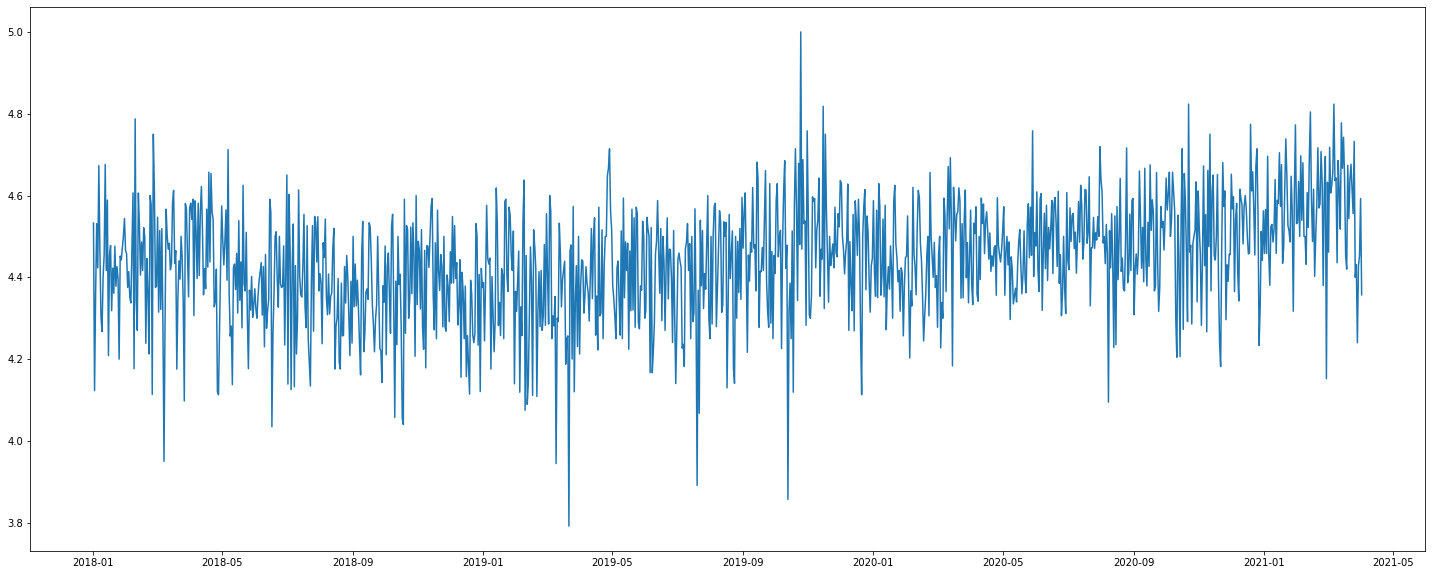

In [4]:

plt.figure(figsize=(25,10))# width,height
plt.plot(day_average.index, day_average['Rating']) #(x,y)

### Rating average by week

In [5]:
data

Course Name  \
0      The Python Mega Course: Build 10 Real World Ap...   
1      The Python Mega Course: Build 10 Real World Ap...   
2      The Python Mega Course: Build 10 Real World Ap...   
3      The Python Mega Course: Build 10 Real World Ap...   
4      The Python Mega Course: Build 10 Real World Ap...   
...                                                  ...   
44995                 Python for Beginners with Examples   
44996  The Python Mega Course: Build 10 Real World Ap...   
44997  The Python Mega Course: Build 10 Real World Ap...   
44998                 Python for Beginners with Examples   
44999  The Python Mega Course: Build 10 Real World Ap...   

                      Timestamp  Rating Comment         Day  
0     2021-04-02 06:25:52+00:00     4.0     NaN  2021-04-02  
1     2021-04-02 05:12:34+00:00     4.0     NaN  2021-04-02  
2     2021-04-02 05:11:03+00:00     4.0     NaN  2021-04-02  
3     2021-04-02 03:33:24+00:00     5.0     NaN  2021-04-02  
4     2021-04-02 03:31:49+00:00     4.5     NaN  2021-04-02  
...                         ...     ...     ...         ...  
44995 2018-01-01 01:11:26+00:00     4.0     NaN  2018-01-01  
44996 2018-01-01 01:09:56+00:00     5.0     NaN  2018-01-01  
44997 2018-01-01 01:08:11+00:00     5.0     NaN  2018-01-01  
44998 2018-01-01 01:05:26+00:00     5.0     NaN  2018-01-01  
44999 2018-01-01 01:01:16+00:00     5.0     NaN  2018-01-01  

[45000 rows x 5 columns]

In [6]:
data["Week"] = data["Timestamp"].dt.strftime('%Y-%U')
#strftime means string for time. %Y - year %U - week. strftime can slice what we want
week_average = data.groupby(["Week"]).mean()
week_average

Rating
Week             
2018-00  4.434564
2018-01  4.424933
2018-02  4.417702
2018-03  4.401024
2018-04  4.468085
...           ...
2021-09  4.560096
2021-10  4.627315
2021-11  4.629121
2021-12  4.607843
2021-13  4.429032

[173 rows x 1 columns]

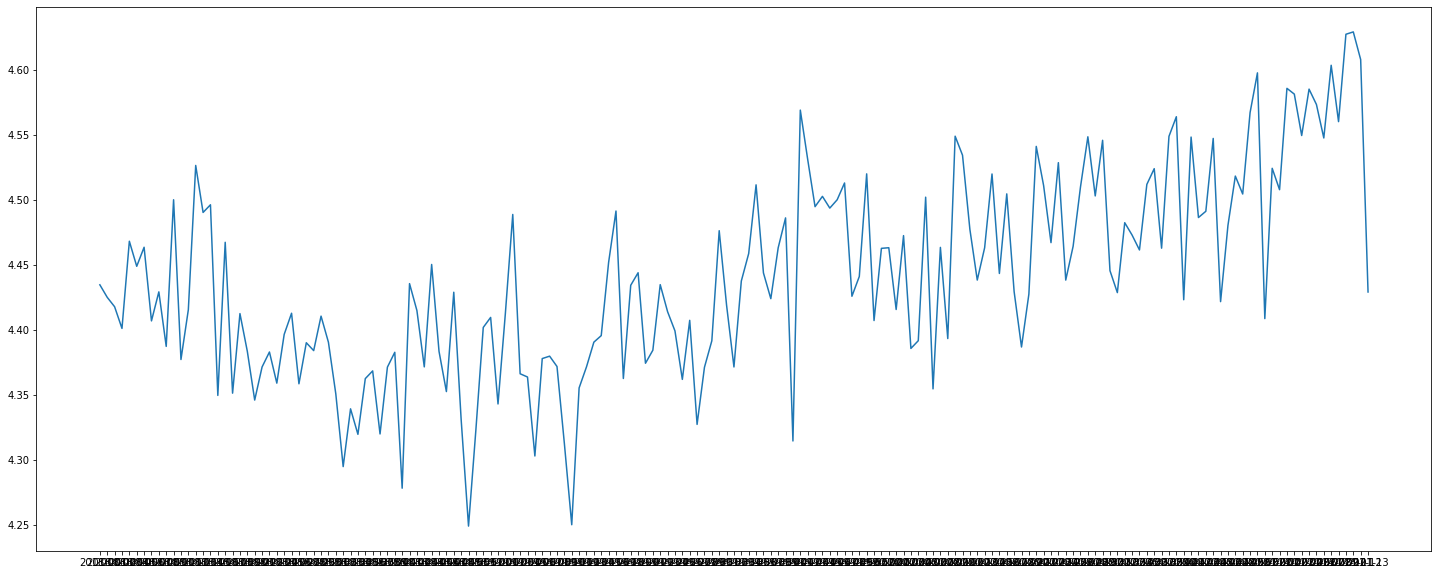

In [7]:
plt.figure(figsize=(25,10))# width,height
plt.plot(week_average.index, week_average['Rating']) #(x,y)

### Rating average by month

In [8]:
data["Month"] = data["Timestamp"].dt.strftime('%Y-%m')
#strftime means string for time. %Y - year %U - week. strftime can slice what we want
month_average = data.groupby(["Month"]).mean()
month_average.head()

Rating
Month            
2018-01  4.429645
2018-02  4.436248
2018-03  4.421671
2018-04  4.468211
2018-05  4.396420

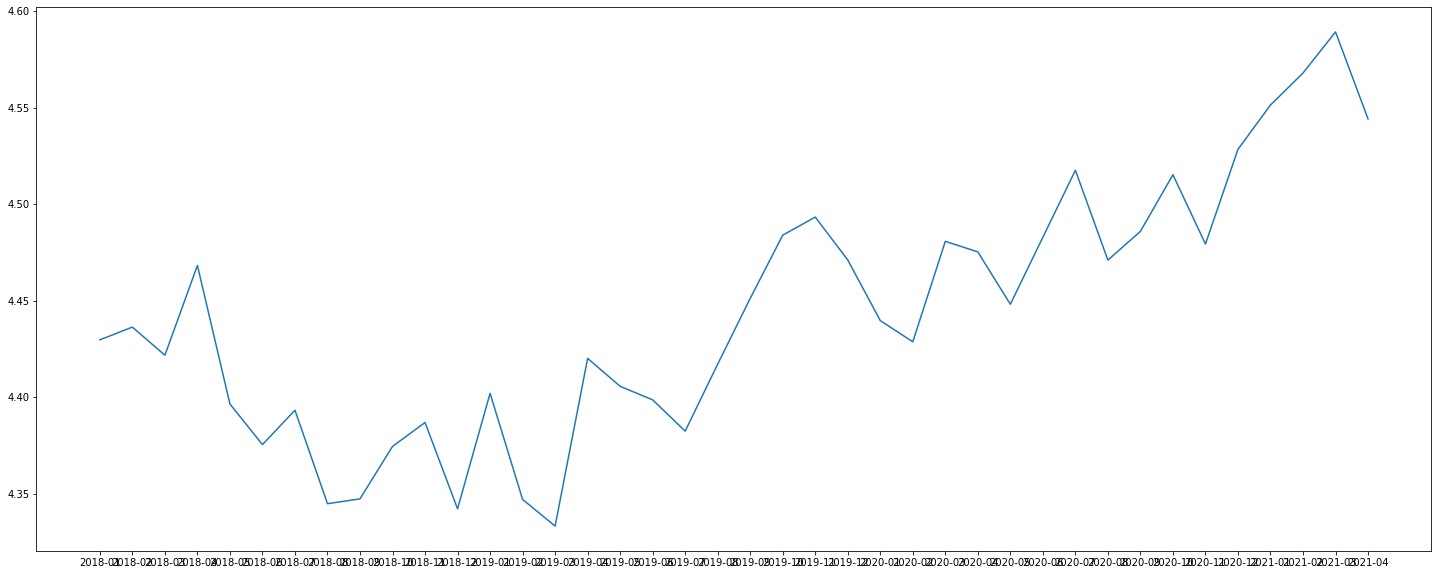

In [12]:
plt.figure(figsize=(25,10))# width,height
plt.plot(month_average.index, month_average['Rating']) #(x,y)

### Average rating by month by course

<AxesSubplot:xlabel='Month'>

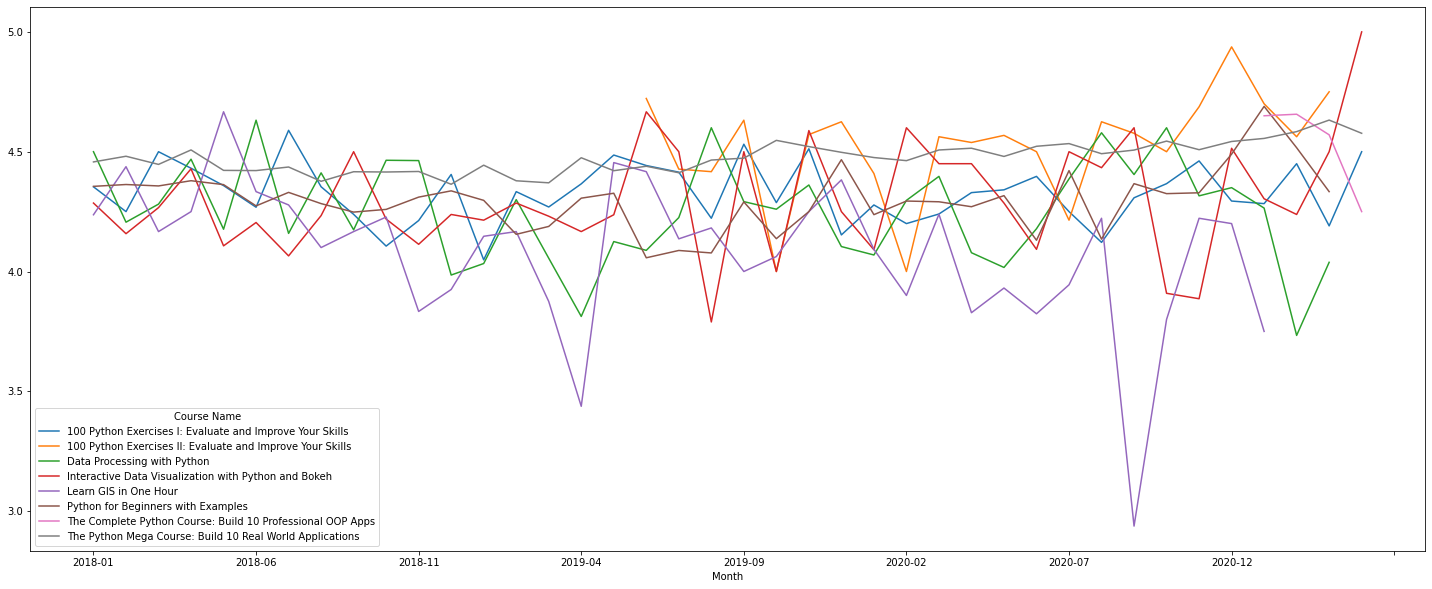

In [19]:
data["Month"] = data["Timestamp"].dt.strftime('%Y-%m')
month_average_crs = data.groupby(['Month','Course Name'])["Rating"].mean().unstack() # unstack is to make different structuer of dataframe

# MEAN drop every kind of collumns besides of rating, but Count not. If we want to use count we need 
# also add at the end ["Rating"] to point that we want it from Rating column
month_average_crs.plot(figsize = (25,10))

## Which day of the week are people the happiest ? 

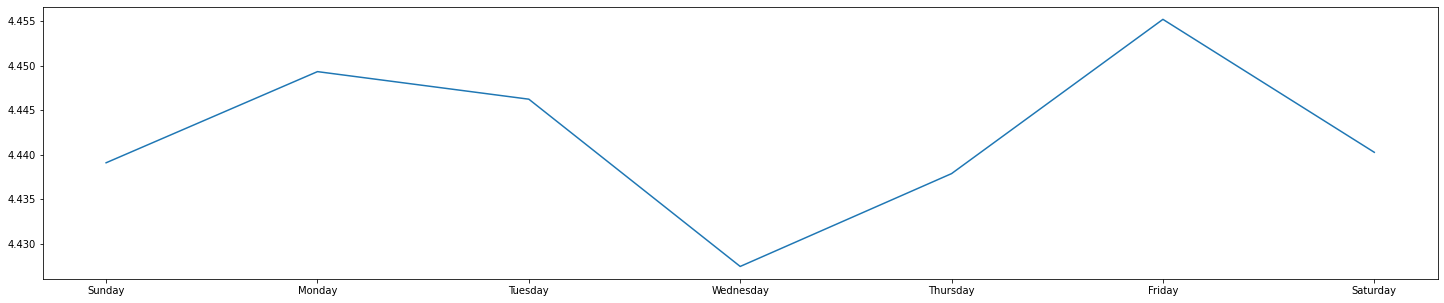

In [63]:
data["Weekday"] = data["Timestamp"].dt.strftime("%A")  
# at first we need to get column which describes weekdays.
data["Daynumber"] = data["Timestamp"].dt.strftime('%w')
# second we need to create next column whcih will store days by numbers becasue indexes are strings
# and we cant sort strings in weekdays order instead of alphabetic
weekday_average = data.groupby(['Weekday','Daynumber']).mean()
weekday_average = weekday_average.sort_values("Daynumber")

# index are strings so if we want to order it in weekdays order we need to use 

weekday_average.index.get_level_values(0) # getting specific index column in multiindex
plt.figure(figsize=[25,5])
plt.plot(weekday_average.index.get_level_values(0), weekday_average["Rating"])

In [64]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : li

### Number of ratings by course

In [66]:
share = data.groupby(['Course Name'])["Rating"].count()
share

Course Name
100 Python Exercises I: Evaluate and Improve Your Skills       1593
100 Python Exercises II: Evaluate and Improve Your Skills       280
Data Processing with Python                                     868
Interactive Data Visualization with Python and Bokeh            767
Learn GIS in One Hour                                           499
Python for Beginners with Examples                             4821
The Complete Python Course: Build 10 Professional OOP Apps      470
The Python Mega Course: Build 10 Real World Applications      35702
Name: Rating, dtype: int64

([<matplotlib.patches.Wedge at 0x1fe47beca30>,
 [Text(2.1864090042832265, 0.24416319540264453, '100 Python Exercises I: Evaluate and Improve Your Skills'),
  Text(2.1359079074363505, 0.5271597584706841, '100 Python Exercises II: Evaluate and Improve Your Skills'),
  Text(2.0868475104714497, 0.6964678514038629, 'Data Processing with Python'),
  Text(1.9939420468963356, 0.9296209515812629, 'Interactive Data Visualization with Python and Bokeh'),
  Text(1.9041029414140114, 1.1019945501219643, 'Learn GIS in One Hour'),
  Text(1.3743348594708493, 1.717906776877966, 'Python for Beginners with Examples'),
  Text(0.6614062628136044, 2.098223476065155, 'The Complete Python Course: Build 10 Professional OOP Apps'),
  Text(-1.752551599003097, -1.329873261943291, 'The Python Mega Course: Build 10 Real World Applications')])

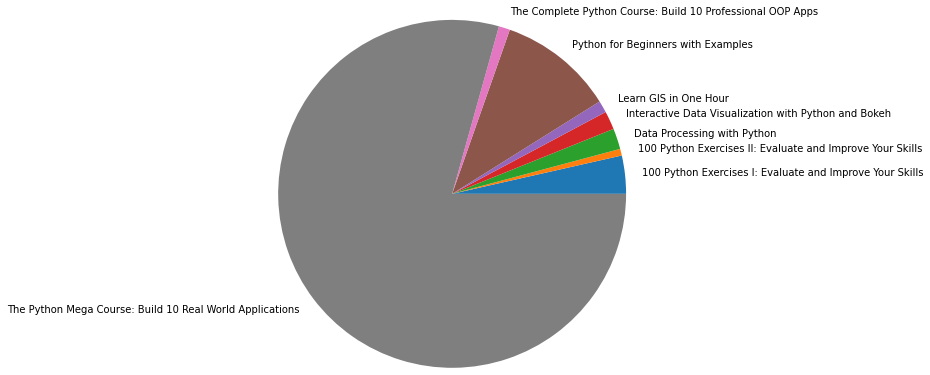

In [74]:

plt.pie(share,labels=share.index, radius = 2)